In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
def pochodna_num(x):
    '''
    Funkcja obliczającą pochodną wyznaczoną metodą
    numeryczną z przybliżeniem do 2ch miejsc po przecinku.
    '''
    h = 1e-5
    return int(((f(x+h)-f(x))/(h))*100)/100


def newton_raphson(f,a,b,precyzja=10**(-6),wykres=True):
    '''
    Funkcja, która robi "coś".
    '''
    if f(a)*f(b)>0:
        return 'Błąd. Warunki nie są spełnione.'
    else:
        x0 = a
        x1 = x0 - f(x0)/pochodna_num(x0)
        X1, Y1 = [], []
        X1.append(x0)
        X1.append(x1)
        Y1.append(f(x0))
        Y1.append(f(x1))
        n = 1
        while abs(x1-x0)>precyzja:
            x0 = x1
            x1 = x0-f(x0)/pochodna_num(x0)
            n += 1
            if n <= 3:
                X1.append(x1)
                Y1.append(f(x1))
    if wykres == True:
        X = np.linspace(a,b,1000)
        Y = [f(x) for x in X]
        plt.plot(X,Y)
        plt.axhline(0,a,b, color='grey', linestyle='--')#, '--', color='grey')


        plt.plot([X1[0],X1[1]],[Y1[0], 0] , color='orange')
        plt.vlines(X1[1], Y1[1], 0, color='orange', linestyles='dashdot')
        plt.plot(X1[1],Y1[1],'o', color='orange')
        plt.plot(X1[1],0, 'o', color='orange')

        plt.plot([X1[1],X1[2]],[Y1[1], 0] , color='red')
        plt.vlines(X1[2], Y1[2], 0, color='red', linestyles='dashdot')
        plt.plot(X1[2],Y1[2],'o', color='red')
        plt.plot(X1[2],0, 'o', color='red')

        plt.plot([X1[2],X1[3]],[Y1[2], 0] , color='green')
        plt.vlines(X1[3], Y1[3], 0, color='green', linestyles='dashdot')
        plt.plot(X1[3],Y1[3],'o', color='green')
        plt.plot(X1[3],0, 'o', color='green')
    else:    
        return x1, X1, Y1

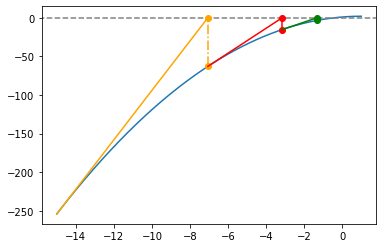

In [95]:
a, b = -15, 1
f = lambda x: -x**2+2*x+1
# f = lambda x: np.log10(x+2)-2
newton_raphson(f,a,b)

In [92]:
f(0)

1